In [3]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Attrition.csv')

In [5]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [6]:
df.head(2)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE


In [7]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

# observation

1. there is no missing data
2. 4 data columns are in object data type
3. gender_short is not required
4. store_name is not valid and it has to be renamed as store_no
5. lengthy_column name must be shorted
6. 

# DATA CLEANING

In [8]:
df = df.rename(columns={'EmployeeID':'eid',
        'recorddate_key':'record_date',
        'birthdate_key':'DOB',
        'orighiredate_key':'hiredate',
        'terminationdate_key':'term_date',
        'length_of_service':'experience',
        'department_name':'dname',
        'job_title':'job',
        'store_name':'store_no',
        'gender_full':'gender',
        'termreason_desc':"term_reason", 
        'termtype_desc':'term_type', 
        'STATUS_YEAR':'status_year',
        'STATUS':'status', 
        'BUSINESS_UNIT':'business_unit'})

df.columns

Index(['eid', 'record_date', 'DOB', 'hiredate', 'term_date', 'age',
       'experience', 'city_name', 'dname', 'job', 'store_no', 'gender_short',
       'gender', 'term_reason', 'term_type', 'status_year', 'status',
       'business_unit'],
      dtype='object')

In [9]:
for i in ['record_date', 'DOB', 'hiredate', 'term_date']:
    df[i]=pd.to_datetime(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   eid            49653 non-null  int64         
 1   record_date    49653 non-null  datetime64[ns]
 2   DOB            49653 non-null  datetime64[ns]
 3   hiredate       49653 non-null  datetime64[ns]
 4   term_date      49653 non-null  datetime64[ns]
 5   age            49653 non-null  int64         
 6   experience     49653 non-null  int64         
 7   city_name      49653 non-null  object        
 8   dname          49653 non-null  object        
 9   job            49653 non-null  object        
 10  store_no       49653 non-null  int64         
 11  gender_short   49653 non-null  object        
 12  gender         49653 non-null  object        
 13  term_reason    49653 non-null  object        
 14  term_type      49653 non-null  object        
 15  status_year    4965

In [10]:
df= df.drop(columns=['gender_short'])

df.columns

Index(['eid', 'record_date', 'DOB', 'hiredate', 'term_date', 'age',
       'experience', 'city_name', 'dname', 'job', 'store_no', 'gender',
       'term_reason', 'term_type', 'status_year', 'status', 'business_unit'],
      dtype='object')

In [11]:
# df[df.duplicated()]

df['eid'] = df['eid'].drop_duplicates()

df.shape[0]



49653

In [12]:
# df.info()

df= df.dropna()

df=df.astype({'eid':int})
df.shape

(6284, 17)

# DATA TRANSFORMATION / DATA MANIPULATION

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6284 entries, 0 to 49649
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   eid            6284 non-null   int64         
 1   record_date    6284 non-null   datetime64[ns]
 2   DOB            6284 non-null   datetime64[ns]
 3   hiredate       6284 non-null   datetime64[ns]
 4   term_date      6284 non-null   datetime64[ns]
 5   age            6284 non-null   int64         
 6   experience     6284 non-null   int64         
 7   city_name      6284 non-null   object        
 8   dname          6284 non-null   object        
 9   job            6284 non-null   object        
 10  store_no       6284 non-null   int64         
 11  gender         6284 non-null   object        
 12  term_reason    6284 non-null   object        
 13  term_type      6284 non-null   object        
 14  status_year    6284 non-null   int64         
 15  status         6284 non-n

In [14]:
df.columns  

Index(['eid', 'record_date', 'DOB', 'hiredate', 'term_date', 'age',
       'experience', 'city_name', 'dname', 'job', 'store_no', 'gender',
       'term_reason', 'term_type', 'status_year', 'status', 'business_unit'],
      dtype='object')

In [15]:
col_idx = [0,2,5,11,3,9,8,7,16,10,15,6,4,13,12,1,14]

new_order = df.columns[col_idx]

new_df= df[new_order] 

df = new_df

#--------------------------------------------(or)

# df = df[df.columns[ {0,2,5,11,3,9,8,7,16,10,15,6,4,13,12,1,14} ]]

In [16]:
df.head(5)

,eid,DOB,age,gender,hiredate,job,dname,city_name,business_unit,store_no,status,experience,term_date,term_type,term_reason,record_date,status_year
0,1318,1954-01-03,52,Male,1989-08-28,CEO,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,1900-01-01,Not Applicable,Not Applicable,2006-12-31,2006
10,1319,1957-01-03,49,Female,1989-08-28,VP Stores,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,1900-01-01,Not Applicable,Not Applicable,2006-12-31,2006
20,1320,1955-01-02,51,Female,1989-08-28,Legal Counsel,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,1900-01-01,Not Applicable,Not Applicable,2006-12-31,2006
30,1321,1959-01-02,47,Male,1989-08-28,VP Human Resources,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,1900-01-01,Not Applicable,Not Applicable,2006-12-31,2006
40,1322,1958-01-09,48,Male,1989-08-31,VP Finance,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,1900-01-01,Not Applicable,Not Applicable,2006-12-31,2006


In [17]:
df.loc[ df['status']=='TERMINATED',['hiredate','term_date','record_date']]

#----------------------------------------------------------------------------------

df.loc[ df['status']=='ACTIVE',['hiredate','term_date','record_date']]

,hiredate,term_date,record_date
0,1989-08-28,1900-01-01,2006-12-31
10,1989-08-28,1900-01-01,2006-12-31
20,1989-08-28,1900-01-01,2006-12-31
30,1989-08-28,1900-01-01,2006-12-31
40,1989-08-31,1900-01-01,2006-12-31
...,...,...,...
48153,2013-12-05,1900-01-01,2013-12-31
48156,2013-12-05,1900-01-01,2013-12-31
48159,2013-12-09,1900-01-01,2013-12-31
48162,2013-12-10,1900-01-01,2013-12-31


In [18]:
cond = (df['status']=='ACTIVE')

df.loc[cond, 'term_date'] = df.loc[cond, 'record_date'] 

df

,eid,DOB,age,gender,hiredate,job,dname,city_name,business_unit,store_no,status,experience,term_date,term_type,term_reason,record_date,status_year
0,1318,1954-01-03,52,Male,1989-08-28,CEO,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
10,1319,1957-01-03,49,Female,1989-08-28,VP Stores,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
20,1320,1955-01-02,51,Female,1989-08-28,Legal Counsel,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
30,1321,1959-01-02,47,Male,1989-08-28,VP Human Resources,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
40,1322,1958-01-09,48,Male,1989-08-31,VP Finance,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,8036,1992-08-09,20,Female,2012-09-05,Cashier,Customer Service,New Westminister,STORES,20,TERMINATED,0,2012-11-18,Voluntary,Resignaton,2012-11-01,2012
49636,8181,1993-09-26,19,Male,2013-04-12,Cashier,Customer Service,Prince George,STORES,26,TERMINATED,0,2013-07-02,Voluntary,Resignaton,2013-07-01,2013
49645,8223,1994-02-11,19,Male,2013-06-24,Cashier,Customer Service,Trail,STORES,33,TERMINATED,0,2013-10-17,Voluntary,Resignaton,2013-10-01,2013
49646,8226,1994-02-16,19,Female,2013-06-26,Cashier,Customer Service,Victoria,STORES,46,TERMINATED,0,2013-09-14,Voluntary,Resignaton,2013-09-01,2013


In [19]:
no_of_days = ( df['term_date'] - df['hiredate'] ).dt.days

no_of_years = no_of_days/365

df['experience'] = round(no_of_years,2)

df.head()

,eid,DOB,age,gender,hiredate,job,dname,city_name,business_unit,store_no,status,experience,term_date,term_type,term_reason,record_date,status_year
0,1318,1954-01-03,52,Male,1989-08-28,CEO,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
10,1319,1957-01-03,49,Female,1989-08-28,VP Stores,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
20,1320,1955-01-02,51,Female,1989-08-28,Legal Counsel,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
30,1321,1959-01-02,47,Male,1989-08-28,VP Human Resources,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
40,1322,1958-01-09,48,Male,1989-08-31,VP Finance,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006


# DATA ANALYSING

# 1. get the number of emps in the dataset

In [20]:
df['eid'].count()

np.int64(6284)

here , the total number of employees are 6284.

# 2.get the number of emps in each gender

In [21]:
gp = df['gender'].value_counts()
gp

gender
Female    3278
Male      3006
Name: count, dtype: int64

the total number of male employees are 3006 , and total number of female employees are 3278

# 3. get the emp who was hired first

In [22]:
hired_first = df['hiredate'].max()         

hired_first
    
df.loc[(df['hiredate']== hired_first),::]


,eid,DOB,age,gender,hiredate,job,dname,city_name,business_unit,store_no,status,experience,term_date,term_type,term_reason,record_date,status_year
48165,8336,1994-12-31,19,Male,2013-12-11,Dairy Person,Dairy,Vancouver,STORES,35,ACTIVE,0.05,2013-12-31,Not Applicable,Not Applicable,2013-12-31,2013


# 4. get the emp who was hired last

In [23]:
hired_first = df['hiredate'].min()

hired_first    
df.loc[(df['hiredate']== hired_first),::]



,eid,DOB,age,gender,hiredate,job,dname,city_name,business_unit,store_no,status,experience,term_date,term_type,term_reason,record_date,status_year
0,1318,1954-01-03,52,Male,1989-08-28,CEO,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
10,1319,1957-01-03,49,Female,1989-08-28,VP Stores,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
20,1320,1955-01-02,51,Female,1989-08-28,Legal Counsel,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
30,1321,1959-01-02,47,Male,1989-08-28,VP Human Resources,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006


# 5. get the number of employees in each status

In [24]:
df['status'].value_counts()

status
ACTIVE        6138
TERMINATED     146
Name: count, dtype: int64

# 6.get the emp with the highest experience

In [25]:
m  = df['experience'].max()      
m

df.loc[(df['experience']== m) , ::]     

,eid,DOB,age,gender,hiredate,job,dname,city_name,business_unit,store_no,status,experience,term_date,term_type,term_reason,record_date,status_year
0,1318,1954-01-03,52,Male,1989-08-28,CEO,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
10,1319,1957-01-03,49,Female,1989-08-28,VP Stores,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
20,1320,1955-01-02,51,Female,1989-08-28,Legal Counsel,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
30,1321,1959-01-02,47,Male,1989-08-28,VP Human Resources,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
40,1322,1958-01-09,48,Male,1989-08-31,VP Finance,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
50,1323,1962-01-09,44,Male,1989-08-31,"Exec Assistant, VP Stores",Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006


# 7. get the employees who are having highest experience in each status

In [26]:
gp = df.groupby('status')

m = df.loc[df['experience'] == gp['experience'].max(), ::]

ValueError: Can only compare identically-labeled Series objects

# 8. no of emp in each term types

In [ ]:
df['term_type'].value_counts()

term_type
Not Applicable    6138
Voluntary          146
Name: count, dtype: int64

# 9. no of emp in each term reasons

In [ ]:
df['term_reason'].value_counts()

term_reason
Not Applicable    6138
Retirement         122
Resignaton          24
Name: count, dtype: int64

# 10. in which bussiness unit more emp  are present 

In [ ]:
df['business_unit'].value_counts()

business_unit
STORES        6204
HEADOFFICE      80
Name: count, dtype: int64

in the stores bussiness unit has more employees .

# 11. no of emp in each job

In [ ]:
df['job'].value_counts()

job
Meat Cutter                        1218
Cashier                            1158
Dairy Person                       1032
Produce Clerk                      1027
Baker                               865
Shelf Stocker                       704
Store Manager                        35
Meats Manager                        34
Produce Manager                      33
Bakery Manager                       33
Customer Service Manager             32
Processed Foods Manager              32
HRIS Analyst                          8
Recruiter                             8
Labor Relations Analyst               5
Systems Analyst                       5
Benefits Admin                        5
Accounting Clerk                      5
Trainer                               4
Accounts Receiveable Clerk            4
Auditor                               3
Corporate Lawyer                      3
Compensation Analyst                  3
Investment Analyst                    3
Accounts Payable Clerk              

# 12. no of employees in each dept.

In [ ]:
gp = df.groupby('dname')
g= gp['dname'].count()
g.sort_values()

#OR

df['dname'].value_counts()


dname
Meats                     1252
Customer Service          1190
Produce                   1060
Dairy                     1033
Bakery                     898
Processed Foods            736
Store Management            35
Executive                   10
Recruitment                  9
HR Technology                9
Accounting                   6
Employee Records             6
Labor Relations              6
Training                     5
Information Technology       5
Accounts Receiveable         5
Compensation                 4
Audit                        4
Accounts Payable             4
Investment                   4
Legal                        3
Name: count, dtype: int64

# 13. year wise number of termination

In [ ]:

df['term_date'].value_counts()

term_date
2006-12-31    4445
2012-12-31     258
2010-12-31     252
2009-12-31     249
2008-12-31     244
              ... 
2012-11-18       1
2013-07-02       1
2013-10-17       1
2013-09-14       1
2013-08-30       1
Name: count, Length: 130, dtype: int64

# 14. get the unique store number

In [ ]:
df['store_no'].unique()

array([35, 32, 18, 19, 16, 37, 15, 12, 31, 36, 28,  6,  9, 30, 21, 46, 25,
        7,  5,  3,  8, 40, 33, 26, 29, 41, 13, 38, 42,  1,  2, 43, 44, 17,
       45, 22, 39, 20, 11, 14, 34, 23, 27, 10, 24,  4])

# 15. in which job more active emp are there

In [ ]:
active_job = df.loc[(df['status']=="ACTIVE"),'job']

active_job.value_counts().reset_index().iloc[0]

job      Meat Cutter
count           1161
Name: 0, dtype: object

# 16. in which dept more active employees are there

In [ ]:
active_dept = df.loc[(df['status']=='ACTIVE'),'dname']

active_dept.value_counts().reset_index().iloc[0]



dname    Meats
count     1195
Name: 0, dtype: object

In [ ]:
df.columns

Index(['eid', 'DOB', 'age', 'gender', 'hiredate', 'job', 'dname', 'city_name',
       'business_unit', 'store_no', 'status', 'experience', 'term_date',
       'term_type', 'term_reason', 'record_date', 'status_year'],
      dtype='object')

# 17. get the unique values from the given columns 
# (gender,job,dept_name,business_unit,status,
# ,term_reason,status_year,city_name)

use looping concept

In [ ]:
p = ['gender','job','dname','business_unit','status','term_reason','status_year','city_name']

for i in p:
    print(f'THE UNIQUE VALUES OF {i}----->  \n',df[i].unique())
    print("------------------------------------------------------")
    print("------------------------------------------------------")

THE UNIQUE VALUES OF gender----->  
 ['Male' 'Female']
------------------------------------------------------
------------------------------------------------------
THE UNIQUE VALUES OF job----->  
 ['CEO' 'VP Stores' 'Legal Counsel' 'VP Human Resources' 'VP Finance'
 'Exec Assistant, VP Stores' 'Exec Assistant, Legal Counsel'
 'CHief Information Officer' 'Store Manager' 'Meats Manager'
 'Exec Assistant, Human Resources' 'Exec Assistant, Finance'
 'Director, Recruitment' 'Director, Training' 'Director, Labor Relations'
 'Director, HR Technology' 'Director, Employee Records'
 'Director, Compensation' 'Corporate Lawyer' 'Produce Manager'
 'Director, Accounts Receivable' 'Bakery Manager' 'Systems Analyst'
 'Director, Accounts Payable' 'Director, Audit' 'Director, Accounting'
 'Director, Investments' 'Dairy Person' 'Recruiter'
 'Processed Foods Manager' 'Customer Service Manager' 'Trainer'
 'Meat Cutter' 'Labor Relations Analyst' 'Dairy Manager' 'HRIS Analyst'
 'Benefits Admin' 'Compensati

In [ ]:
df

,eid,DOB,age,gender,hiredate,job,dname,city_name,business_unit,store_no,status,experience,term_date,term_type,term_reason,record_date,status_year
0,1318,1954-01-03,52,Male,1989-08-28,CEO,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
10,1319,1957-01-03,49,Female,1989-08-28,VP Stores,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
20,1320,1955-01-02,51,Female,1989-08-28,Legal Counsel,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
30,1321,1959-01-02,47,Male,1989-08-28,VP Human Resources,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
40,1322,1958-01-09,48,Male,1989-08-31,VP Finance,Executive,Vancouver,HEADOFFICE,35,ACTIVE,17.35,2006-12-31,Not Applicable,Not Applicable,2006-12-31,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,8036,1992-08-09,20,Female,2012-09-05,Cashier,Customer Service,New Westminister,STORES,20,TERMINATED,0.20,2012-11-18,Voluntary,Resignaton,2012-11-01,2012
49636,8181,1993-09-26,19,Male,2013-04-12,Cashier,Customer Service,Prince George,STORES,26,TERMINATED,0.22,2013-07-02,Voluntary,Resignaton,2013-07-01,2013
49645,8223,1994-02-11,19,Male,2013-06-24,Cashier,Customer Service,Trail,STORES,33,TERMINATED,0.32,2013-10-17,Voluntary,Resignaton,2013-10-01,2013
49646,8226,1994-02-16,19,Female,2013-06-26,Cashier,Customer Service,Victoria,STORES,46,TERMINATED,0.22,2013-09-14,Voluntary,Resignaton,2013-09-01,2013


# Q1) Identify the Top 3 Years with the Highest Attrition Rate
- Observe the termination type
- Observe the termination reason
- Identify which job roles were affected
- Identify which departments were affected
- Identify which experience levels were affected

<Axes: xlabel='year', ylabel='count'>

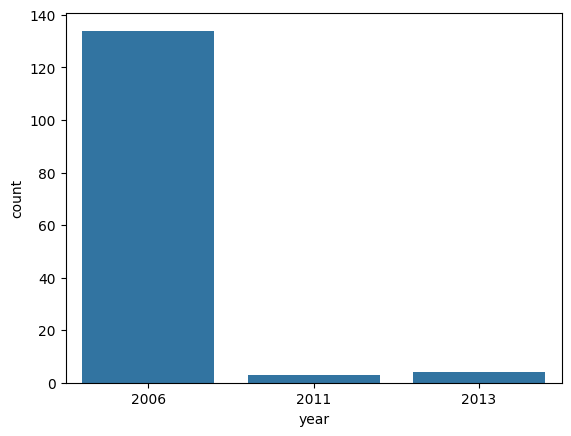

In [ ]:
attr_cnt =df.loc[df['status']=='TERMINATED','term_date'].dt.year.value_counts().reset_index().head(3)


attr_cnt.columns = ['year','count']


attr_cnt

sns.barplot(data=attr_cnt,x='year',y='count')


In [ ]:
term3_df = df.loc[(df['status']=='TERMINATED') & (df['status_year'].isin([2006,2011,2013]))]

term3_df


,eid,DOB,age,gender,hiredate,job,dname,city_name,business_unit,store_no,status,experience,term_date,term_type,term_reason,record_date,status_year
48415,1951,1952-07-05,54,Male,1991-07-05,Meat Cutter,Meats,Kelowna,STORES,16,TERMINATED,15.21,2006-09-16,Voluntary,Resignaton,2006-09-01,2006
48422,2266,1954-04-05,52,Female,1992-06-06,Dairy Person,Dairy,North Vancouver,STORES,22,TERMINATED,14.27,2006-09-08,Voluntary,Resignaton,2006-09-01,2006
48423,2303,1941-01-15,65,Female,1992-07-22,Meat Cutter,Meats,New Westminster,STORES,21,TERMINATED,13.49,2006-01-15,Voluntary,Retirement,2006-01-01,2006
48424,2304,1941-01-15,65,Female,1992-07-22,Meat Cutter,Meats,Vernon,STORES,36,TERMINATED,13.49,2006-01-15,Voluntary,Retirement,2006-01-01,2006
48427,2332,1941-02-14,65,Female,1992-08-21,Dairy Person,Dairy,Chilliwack,STORES,6,TERMINATED,13.49,2006-02-14,Voluntary,Retirement,2006-02-01,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49561,7801,1990-10-18,21,Female,2011-09-23,Dairy Person,Dairy,Abbotsford,STORES,1,TERMINATED,0.08,2011-10-23,Voluntary,Resignaton,2011-10-01,2011
49636,8181,1993-09-26,19,Male,2013-04-12,Cashier,Customer Service,Prince George,STORES,26,TERMINATED,0.22,2013-07-02,Voluntary,Resignaton,2013-07-01,2013
49645,8223,1994-02-11,19,Male,2013-06-24,Cashier,Customer Service,Trail,STORES,33,TERMINATED,0.32,2013-10-17,Voluntary,Resignaton,2013-10-01,2013
49646,8226,1994-02-16,19,Female,2013-06-26,Cashier,Customer Service,Victoria,STORES,46,TERMINATED,0.22,2013-09-14,Voluntary,Resignaton,2013-09-01,2013


In [ ]:
# df (06,11,13) (Terminated)

# cnt--x=status yaer ,hue => ()

# - Observe the termination type

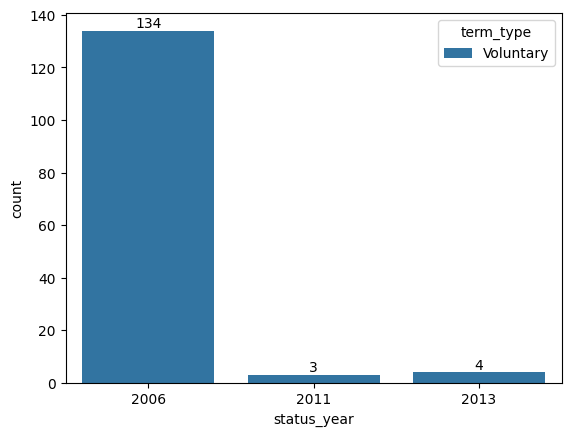

In [ ]:
a = sns.countplot(data=term3_df ,x='status_year',hue='term_type')

for i in a.containers:
    a.bar_label(i)

#  Observe the termination reason

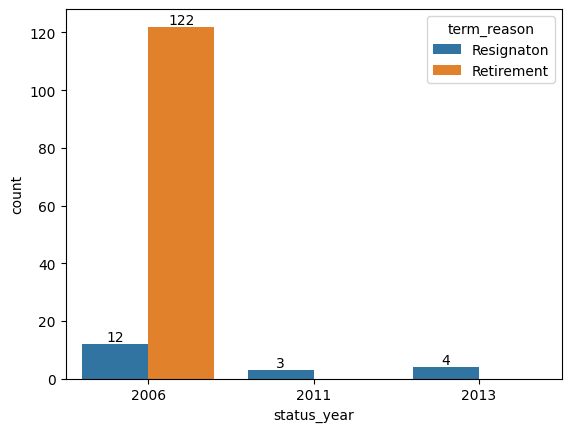

In [ ]:
a = sns.countplot(data=term3_df ,x='status_year',hue='term_reason')

for i in a.containers:
    a.bar_label(i)

# Identify which job roles were affected

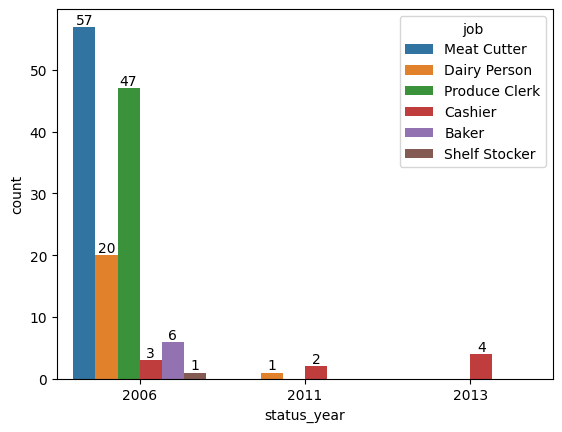

In [ ]:
a = sns.countplot(data=term3_df ,x='status_year',hue='job')

for i in a.containers:
    a.bar_label(i)

# Identify which departments were affected

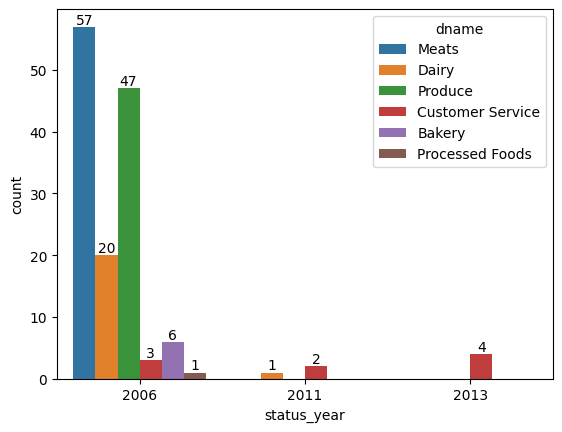

In [ ]:
a = sns.countplot(data=term3_df ,x='status_year',hue='dname')

for i in a.containers:
    a.bar_label(i)

# Identify which experience levels were affected

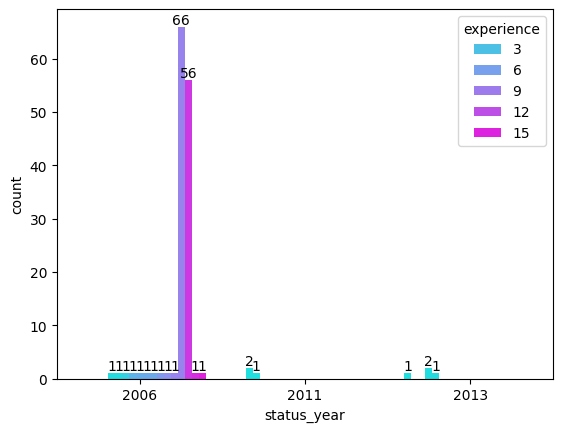

In [ ]:
a = sns.countplot(data=term3_df ,x='status_year',hue='experience',palette='cool')

for i in a.containers:
    a.bar_label(i)

# Q3) Analyze the Trend of Attrition and Retention Over the Years

In [ ]:
attr_count = df.loc[df['status']=='TERMINATED','term_date'].dt.year.value_counts().reset_index()
attr_count.columns=['year','att_count']

tot_emp_year = df['hiredate'].dt.year.value_counts().reset_index()
tot_emp_year.columns = ['year','tot_count']

new_dt = pd.merge(tot_emp_year,attr_count,how='outer')
new_dt

new_dt['att_count'] = new_dt['att_count'].fillna(0).astype(int)

new_dt['rnt_cnt'] = new_dt['tot_count']-new_dt['att_count'] 
    
new_dt  


,year,tot_count,att_count,rnt_cnt
0,1989,86,0,86
1,1990,214,0,214
2,1991,200,0,200
3,1992,248,0,248
4,1993,298,0,298
5,1994,298,0,298
6,1995,312,0,312
7,1996,273,0,273
8,1997,312,0,312
9,1998,341,0,341



# Q2) Identify the Top 3 Years Where Retention Was Higher Than Attrition

In [ ]:
new_dt.sort_values(by='rnt_cnt',ascending=False).head(3)

#------------------------------------------------------------

new_dt.sort_values(by='rnt_cnt',ascending=False).head(3)['year']


9     1998
10    1999
8     1997
Name: year, dtype: int32

In [ ]:
new_df.loc[new_df['ret_count']>new_df['att_count']].sort_values(by='ret_count',ascending=False).head(3)['year']

KeyError: 'ret_count'

# Q5) Detect Outliers in Employee Experience Data

#  Q4) Get the Count of Employees Based on Experience Levels

In [ ]:
gp = df.groupby('experience')['eid'].count()

gp

experience
0.00     10
0.01     20
0.02     15
0.03     13
0.04     14
         ..
17.30     3
17.32     3
17.33     1
17.34     1
17.35     6
Name: eid, Length: 1588, dtype: int64